In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
original = pd.read_csv("telecom_churn_data.csv")

original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [3]:
original.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

### Handling missing values 

In [4]:
print(100*(original.isnull().sum()/len(original.index)))

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

### Imputing missing values

In [5]:
df_telecom = original.copy()
# Imputing missing values in recharge columns with 0 because Nan means they dint recharge
recharge = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]

df_telecom[recharge].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


In [6]:
# All the values with minimum value as 1 can be replaced with 0 as there is no recharge
impute= ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]
df_telecom[impute] = df_telecom[impute].fillna(0)

In [7]:
print(100*(df_telecom.isnull().sum()/len(df_telecom.index)))

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

In [8]:
## Checking stats for columns for columns with zero variance
cols=['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6',
                     'std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7',
                   'std_ic_t2o_mou_8','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'
     ]
df_telecom[cols].describe()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8
count,99999.0,98981.0,98981.0,98981.0,96062.0,96140.0,94621.0,96062.0,96140.0,94621.0
mean,109.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,109.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,109.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,109.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,109.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,109.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
## Drop the columns which has 0 variance
df_telecom.drop(cols,1,inplace=True)

print(100*(df_telecom.isnull().sum()/len(df_telecom.index)))

mobile_number                0.000000
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_7                3.859039
roam_og_mou_8                5.378054
roam_og_mou_9                7.745077
loc_og_t2t_mou_6             3.937039
loc_og_t2t_mou_7             3.859039
loc_og_t2t_mou_8             5.378054
loc_og_t2t_mou_9             7.745077
loc_og_t2m_m

In [10]:
# Handling date columns, we can see that all the date columns are of type object.

df_telecom.dtypes

mobile_number                 int64
last_date_of_month_9         object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
roam_og_mou_9               float64
loc_og_t2t_mou_6            float64
loc_og_t2t_mou_7            float64
loc_og_t2t_mou_8            float64
loc_og_t2t_mou_9            float64
loc_og_t2m_mou_6            float64
loc_og_t2m_mou_7            

In [11]:
# List the date columns and lets drop them as they are not usefull for further analysis
datelist = list(df_telecom.select_dtypes(include=['object']).columns)
df_telecom.drop(datelist,1,inplace=True)

In [12]:
# Dropping columns with 70% missing values
missing_df= pd.DataFrame((100*df_telecom.isnull().sum()/len(df_telecom)),columns=['missing_perc'])

missinglist= list(missing_df[missing_df['missing_perc']>70].index)
df_telecom.drop(missinglist,1,inplace=True)

In [13]:
## Impute the remaining small number of missing values using simpleimputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
df_telecom_imputed = pd.DataFrame(imputer.fit_transform(df_telecom))
df_telecom_imputed.columns = df_telecom.columns
df_telecom_imputed.index = df_telecom.index


(100*df_telecom_imputed.isnull().sum()/len(df_telecom_imputed))

mobile_number         0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_mou_9      0.0
loc_og_mou_6          0.0
loc_og_mou_7

### Filter High valued customers

In [14]:
# Get total recharge amounts for 6 and 7th months

df_telecom_imputed['total_rech_data_amt_6']=df_telecom_imputed['av_rech_amt_data_6'] * df_telecom_imputed['total_rech_data_6']
df_telecom_imputed['total_rech_data_amt_7']=df_telecom_imputed['av_rech_amt_data_7'] * df_telecom_imputed['total_rech_data_7']

# Get average recharge amount for each customer
df_telecom_rech_6 = df_telecom_imputed['total_rech_data_amt_6']+df_telecom_imputed['total_rech_amt_6']
df_telecom_rech_7 = df_telecom_imputed['total_rech_data_amt_7']+df_telecom_imputed['total_rech_amt_7']

df_telecom_av_rech_amt_6_7 = (df_telecom_rech_6+df_telecom_rech_7)/2

# take 70 percentile of the calculated average amount
percentile_70_6_7 = np.percentile(df_telecom_av_rech_amt_6_7, 70.0)
print("70 percentile is : ", percentile_70_6_7)

70 percentile is :  478.0


In [15]:
df_telecom_hvc = df_telecom_imputed[df_telecom_av_rech_amt_6_7 >= percentile_70_6_7]
df_telecom_hvc.shape

(30001, 182)

### Derive churn

In [16]:
# We will derive Churn and drop ann 9th month columns because it is not necesary for further analysis
df_telecom_hvc['total_usage_9'] = df_telecom_hvc['total_og_mou_9']+df_telecom_hvc['total_ic_mou_9']+df_telecom_hvc['vol_2g_mb_9']+df_telecom_hvc['vol_3g_mb_9']
df_telecom_hvc['churn'] = np.where(df_telecom_hvc['total_usage_9']== 0, 1, 0)
print("Churn Percent: ")
print(100 * (df_telecom_hvc['churn'].value_counts()/df_telecom_hvc.shape[0]))

Churn Percent: 
0    91.863605
1     8.136395
Name: churn, dtype: float64


In [17]:
# Drop all 9th month columns
filter_col = [col for col in df_telecom_hvc if '_9' in col]
df_telecom_hvc.drop(filter_col,axis=1,inplace=True)

df_telecom_hvc.shape

(30001, 138)

In [18]:
df_telecom_hvc.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,churn
0,7.000843e+09,197.385,214.816,213.803,132.395875,133.670805,0.00,197.935577,197.045133,0.00,9.950013,7.149898,0.00,13.911337,9.818732,0.00,47.100763,46.47301,0.00,93.342088,91.397131,0.00,3.751013,3.792985,0.00,1.123056,1.3685,0.00,144.201175,141.670476,0.00,79.82987,83.299598,0.00,87.299624,90.804137,0.00,1.129011,1.11501,0.00,168.261218,175.221436,0.00,0.798277,0.776572,0.00,3.916811,4.978279,0.00,0.454157,0.030235,0.0,0.00,0.00,0.00,47.922365,47.99052,0.16,107.47565,107.120493,4.13,12.084305,12.599697,1.15,167.491059,167.71954,5.44,9.575993,10.011904,0.00,20.72224,21.656415,0.00,2.156397,2.216923,0.00,32.457179,33.887833,0.00,0.00,0.00,5.44,0.061557,0.033585,0.0,7.460608,8.334936,0.00,0.854656,1.01296,0.00,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,968.0,30.40,0.00,101.20,3.58,252.0,252.0,1
7,7.000702e+09,1069.180,1349.850,3171.480,57.840000,54.680000,52.29,453.430000,567.160000,325.91,16.230000,33.490000,31.64,23.740000,12.590000,38.06,51.390000,31.38000,40.28,308.630000,447.380000,162.28,62.130000,55.140000,53.23,0.000000,0.0000,0.00,422.160000,533.910000,255.79,4.30000,23.290000,12.01,49.890000,31.760000,49.14,6.660000,20.08000,16.68,60.860000,75.140000,77.84,0.000000,0.180000,10.01,4.500000,0.000000,6.50,0.000000,0.000000,0.0,487.53,609.24,350.16,58.140000,32.26000,27.31,217.56000,221.490000,121.19,152.160000,101.460000,39.53,427.880000,355.23000,188.04,36.890000,11.830000,30.39,91.44000,126.990000,141.33,52.190000,34.240000,22.21,180.540000,173.080000,193.94,626.46,558.04,428.74,0.210000,0.000000,0.0,2.060000,14.530000,31.59,15.740000,15.19000,15.14,5.0,5.0,7.0,1580.0,790.0,3638.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.00,0.0,0.0,1
8,7.001525e+09,378.721,492

In [19]:
df_telecom_hvc.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,churn
count,3.000100e+04,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,7.001206e+09,558.490824,560.782203,508.597957,263.198136,270.211922,239.317807,377.289670,381.630159,342.769415,16.291107,12.770483,12.785940,26.824261,20.327835,20.255835,85.340389

### Outlier Treatment

In [20]:
continuos_cols = [col for col in df_telecom_hvc.columns if col not in ['churn','mobile_number']]

for col in continuos_cols:
    quantiles = df_telecom_hvc[col].quantile([0.01,0.99]).values
    df_telecom_hvc[col][df_telecom_hvc[col] <= quantiles[0]] = quantiles[0]
    df_telecom_hvc[col][df_telecom_hvc[col] >= quantiles[1]] = quantiles[1]

In [21]:
df_telecom_hvc.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,churn
count,3.000100e+04,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,7.001206e+09,548.809784,551.084737,498.243103,254.571147,261.016284,230.100840,369.488789,373.043985,332.731326,13.75368,9.764286,10.049318,22.985209,16.864642,16.375443,77.132327,7

### Data Preparation
#### Deriving new columns

In [22]:
# Since it is an usage based churn lets get a new column for difference between 
# total out going calls and incoming calls for 8th month and 6 and 7th months
# any negative value in these columns will indicate negative trend
df_telecom_hvc['total_og_mou_diff'] = df_telecom_hvc.total_og_mou_8 - ((df_telecom_hvc.total_og_mou_6 + df_telecom_hvc.total_og_mou_7)/2)
df_telecom_hvc['total_ic_mou_diff'] = df_telecom_hvc.total_ic_mou_8 - ((df_telecom_hvc.total_ic_mou_6 + df_telecom_hvc.total_ic_mou_7)/2)
# internet usage difference
df_telecom_hvc['internet_2g_diff'] = df_telecom_hvc.vol_2g_mb_8 - ((df_telecom_hvc.vol_2g_mb_6 + df_telecom_hvc.vol_2g_mb_7)/2)
df_telecom_hvc['internet_3g_diff'] = df_telecom_hvc.vol_3g_mb_8 - ((df_telecom_hvc.vol_3g_mb_6 + df_telecom_hvc.vol_3g_mb_7)/2)

In [23]:
## Add a new column to bin the records for all recharge amounts in 8th month. this will give the 
# indication of which bin customers churn more
df_telecom_hvc['recharge_bin_8'] = pd.cut(df_telecom_hvc['total_rech_amt_8'],bins = [0,250,500,750, 2000,3000], labels =['No_recharge','Less','Medium','High','V.High'])

df_telecom_hvc['recharge_bin_8'].value_counts()

Less           7895
High           7431
Medium         6609
No_recharge    5281
V.High          546
Name: recharge_bin_8, dtype: int64

### EDA
### Univariate analysis

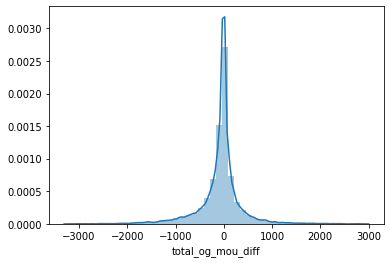

In [24]:
sns.distplot(df_telecom_hvc['total_og_mou_diff'])

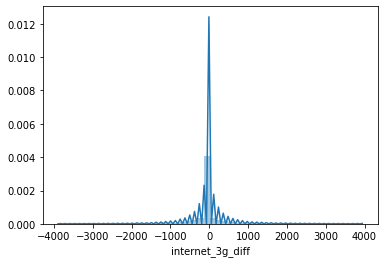

In [25]:
sns.distplot(df_telecom_hvc['internet_3g_diff'])

### Bivariate Analysis

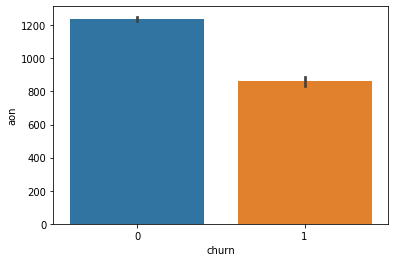

In [26]:
sns.barplot(x='churn', y='aon', data=df_telecom_hvc)

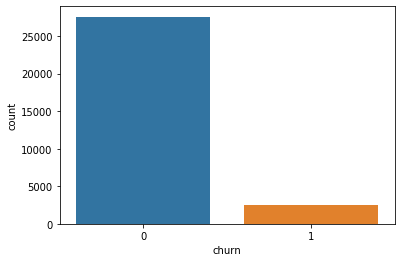

In [27]:
sns.countplot(x='churn',  data=df_telecom_hvc)

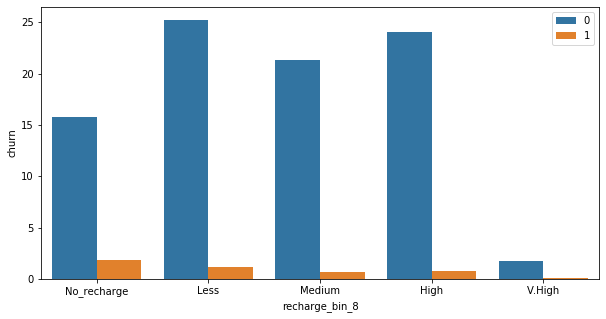

In [28]:
plt.figure(figsize=(10,5))
sns.barplot(y='churn', x='recharge_bin_8',hue="churn", data=df_telecom_hvc,estimator=lambda x: len(x) / len(df_telecom_hvc) * 100)
plt.legend(loc='best')

- We can see that the churn rate is going down for increase in amount of recharge in 8th month

In [29]:
df_telecom_hvc.drop(columns = list(df_telecom_hvc.select_dtypes(include=['category']).columns), axis =1, inplace = True)

### Modelling

In [30]:
# Import required models
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

### PreProcessing data
##### Test Train split

In [31]:
# devide data into train and test
X=df_telecom_hvc.drop(['churn','mobile_number'],axis=1)
y=df_telecom_hvc['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, train_size=0.7, random_state=4)

In [32]:
print("Training dataset size",X_train.shape)
print("Training dataset target size",y_train.shape)
print("Test dataset size",X_test.shape)
print("Test dataset target size",y_test.shape)

Training dataset size (21000, 140)
Training dataset target size (21000,)
Test dataset size (9001, 140)
Test dataset target size (9001,)


### Applying PCA

In [33]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [34]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [35]:
pca.components_

array([[ 9.57229845e-02,  1.07510581e-01,  1.00903902e-01, ...,
        -8.57002207e-04,  1.02272787e-02,  1.99311320e-02],
       [ 1.15782886e-01,  1.48666828e-01,  1.51370043e-01, ...,
         9.46726269e-03,  3.65032809e-03, -9.99223292e-03],
       [ 7.58322277e-02,  7.40360012e-02,  1.13795384e-01, ...,
         5.32015520e-03,  7.19590514e-03,  3.82097760e-02],
       ...,
       [ 0.00000000e+00,  1.85837882e-16,  1.90283741e-16, ...,
        -1.74968655e-01, -9.51831794e-02,  5.41013993e-01],
       [ 0.00000000e+00,  1.93038858e-16, -1.65812541e-16, ...,
         5.55688498e-01,  1.60485299e-01,  9.34717895e-02],
       [ 0.00000000e+00,  7.16188552e-17,  2.01049939e-20, ...,
         1.82368461e-01, -6.03752607e-01, -4.71646887e-02]])

In [36]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,0.095723,0.115783,arpu_6
1,0.107511,0.148667,arpu_7
2,0.100904,0.151370,arpu_8
3,0.132603,0.051775,onnet_mou_6
4,0.149847,0.071297,onnet_mou_7


In [37]:
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       26.46
1       41.88
2       52.83
3       58.94
4       64.78
5       70.41
6       75.25
7       79.35
8       82.53
9       84.79
10      86.87
11      88.76
12      90.05
13      91.09
14      92.02
15      92.80
16      93.53
17      94.19
18      94.81
19      95.32
20      95.77
21      96.13
22      96.48
23      96.80
24      97.11
25      97.37
26      97.62
27      97.83
28      98.00
29      98.17
30      98.32
31      98.48
32      98.61
33      98.73
34      98.83
35      98.92
36      99.00
37      99.07
38      99.13
39      99.19
40      99.24
41      99.29
42      99.34
43      99.38
44      99.43
45      99.47
46      99.51
47      99.55
48      99.58
49      99.61
50      99.64
51      99.67
52      99.70
53      99.73
54      99.75
55      99.77
56      99.79
57      99.81
58      99.82
59      99.84
60      99.85
61      99.86
62      99.87
63      99.88
64      99.89
65      99.90
66      99.91
67      99.91
68      99.92
69      99.93
70      99.93
71    

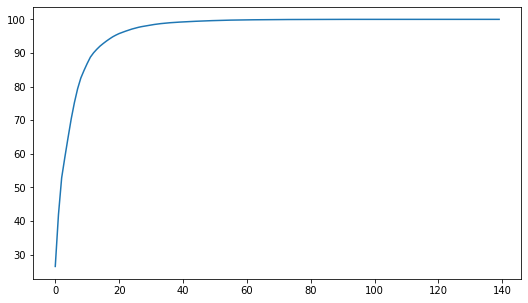

In [38]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

- From the above we can see that 20 features gives around 95 percent variance

In [39]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=40)

In [40]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(21000, 40)

In [41]:
#Applying selected components to the test data
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9001, 40)

### 1. PCA and Logistic Regression

In [42]:
from sklearn.preprocessing import StandardScaler
# create pipeline
PCA_VARS = 30
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [43]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.8385238095238096

In [44]:
#Using incremental PCA for efficiency
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=30)

In [45]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(21000, 30)

In [46]:
#Applying selected components to the test data
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9001, 30)

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [48]:
df_train_pca.shape

(21000, 30)

In [49]:
#training the regression model
LogSk_learner_pca2 = LogisticRegression(class_weight='balanced')
model_pca2 = LogSk_learner_pca2.fit(df_train_pca,y_train)

In [50]:
#Making prediction on the test data
pred_probs_test= model_pca2.predict_proba(df_test_pca)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.86'

In [51]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_probs_test)

In [52]:
y_pred_df.head()

,0
0,0.212168
1,0.108042
2,0.000478
3,0.020747
4,0.169573


In [53]:
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[0]]

In [54]:
y_pred_1.head()

,0
0,0.212168
1,0.108042
2,0.000478
3,0.020747
4,0.169573


In [55]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
31602,0
1272,1
18798,0
84418,0
61381,0


In [56]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True,inplace=True)

In [57]:
y_pred_1.head()

,0
0,0.212168
1,0.108042
2,0.000478
3,0.020747
4,0.169573


In [58]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

In [59]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [60]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

In [64]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Churn_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.212168,0,1,1,1,0,0,0,0,0,0,0
1,1,0.108042,0,1,1,0,0,0,0,0,0,0,0
2,0,0.000478,0,1,0,0,0,0,0,0,0,0,0
3,0,0.020747,0,1,0,0,0,0,0,0,0,0,0
4,0,0.169573,0,1,1,0,0,0,0,0,0,0,0


In [65]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.084213  0.000000  1.000000
0.1   0.1  0.373070  0.319665  0.953826
0.2   0.2  0.512054  0.473735  0.928760
0.3   0.3  0.620820  0.595172  0.899736
0.4   0.4  0.710032  0.696712  0.854881
0.5   0.5  0.790801  0.788790  0.812665
0.6   0.6  0.857460  0.866917  0.754617
0.7   0.7  0.895567  0.919447  0.635884
0.8   0.8  0.914898  0.956933  0.457784
0.9   0.9  0.918120  0.985200  0.188654


#### Evaluating on test data

In [66]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.predicted )
confusion

array([[6502, 1741],
       [ 142,  616]], dtype=int64)

In [67]:
TP = confusion[0,0] # true positive 
TN = confusion[1,1] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print(TP)
print(TN)
print(FP)
print(FN)

6502
616
1741
142


In [68]:
#Let's check the overall accuracy.
metrics.accuracy_score( y_pred_final.churn, y_pred_final.predicted)

0.7908010221086545

In [69]:
# Let's see the sensitivity of our logistic regression model
print('sensitivity =', TP / float(TP+FN))

# Let's see the specificity of our logistic regression model
print('specificity =', TN / float(TN+FP))

y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

sensitivity = 0.9786273329319687
specificity = 0.2613491726771319
AUC:    	 0.88


#### Hyperparameter tuning - PCA and Logistic Regression

In [70]:
# PCA
pca = PCA(n_components=20)

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, refit='recall_score', n_jobs=-1, verbose=1)

In [71]:
# fit model
model.fit(df_train_pca, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   30.8s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight={0: 0.1,
                                                                         1: 0.9},
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ra

In [72]:
# cross validation results
pd.DataFrame(model.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.476170,0.032334,0.006604,0.003325,0.1,l1,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'}",0.840990,0.840514,0.827143,0.830912,0.836628,0.835238,0.005424,1
1,0.417232,0.059736,0.007928,0.007075,0.1,l2,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'}",0.837658,0.837896,0.827619,0.829245,0.833532,0.833190,0.004215,16
2,0.511507,0.084994,0.009978,0.009037,0.5,l1,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'}",0.840752,0.840514,0.829762,0.830912,0.834246,0.835238,0.004646,1
3,0.460257,0.018656,0.012209,0.013281,0.5,l2,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'}",0.839562,0.839562,0.830476,0.829245,0.833770,0.834524,0.004372,15
4,0.599641,0.025353,0.006328,0.005869,1,l1,"{'logistic__C': 1, 'logistic__penalty': 'l1'}",0.840038,0.840038,0.830476,0.830674,0.834484,0.835143,0.004245,3


In [73]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)
print("Best estimator: ", model.best_estimator_)

Best AUC:  0.8352380952380952
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l1'}
Best estimator:  Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logistic',
                 LogisticRegression(C=0.1, class_weight={0: 0.1, 1: 0.9},
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=100, multi_class='warn',
                                    n_jobs=None, penalty='l1',
                                    random_state=None, solver='warn',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False)


In [74]:
## Using all optimum values obtained from GridsearchCV

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(C=0.1,penalty='l2',class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
final_model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, refit='recall_score', n_jobs=-1, verbose=1)

In [75]:
# fit model
final_model.fit(df_train_pca, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    8.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('logistic',
                                        LogisticRegression(C=0.1,
                                                           class_weight={0: 0.1,
                                                                         1: 0.9},
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ra

In [76]:
# predict churn on test data
y_pred = final_model.predict(df_test_pca)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[6907 1336]
 [ 170  588]]


In [77]:
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

In [78]:
# Let's see the sensitivity of our logistic regression model
print('sensitivity =', TP / float(TP+FN))

# Let's see the specificity of our logistic regression model
print('specificity =', TN / float(TN+FP))

y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

sensitivity = 0.7757255936675461
specificity = 0.8379230862550042
AUC:    	 0.88


#### Lasso Regularization with PCA 

In [79]:
from sklearn.linear_model import Lasso

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# cross validation
model_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)

In [80]:
model_lasso.fit(df_train_pca,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    4.2s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [81]:
# predict churn on test data
y_pred = final_model.predict(df_test_pca)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[6907 1336]
 [ 170  588]]


- We can see that Logistic Regression with L2 penalty is same as Lasso Regression. Hence no improvement in values

### 2. Random Forest Classifier with PCA 

In [82]:
# Random forest

# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')

# fit
rfc.fit(df_train_pca,y_train)

# Making predictions
y_pred_default = rfc.predict(df_test_pca)

In [83]:
confusion_rf=confusion_matrix(y_test,y_pred_default)
confusion_rf

array([[8178,   65],
       [ 662,   96]], dtype=int64)

In [84]:
TN = confusion_rf[0,0] # true positive 
TP = confusion_rf[1,1] # true negatives
FP = confusion_rf[0,1] # false positives
FN = confusion_rf[1,0] # false negatives

# Check the sensitivity OR Recall of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Check the specificity of our logistic regression model
print('Specificity: ',TN / float(TN+FP))

# Misclassification rate
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.1266490765171504
Specificity:  0.9921145214121072
Misclassification Rate:  0.08076880346628153


#### Hyper parameter tuning for Random forest

In [85]:
# Instantiatiate the Randome forest Classifier
rf_pca = RandomForestClassifier(class_weight='balanced')

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}
#Fit tree on training data
rf_with_pca = GridSearchCV(rf_pca, parameters, 
                    cv=5, 
                   scoring="accuracy", n_jobs=-1,return_train_score=True)
rf_with_pca.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [86]:
# scores of GridSearch CV
scores = rf_with_pca.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.512936,0.005425,0.009376,7.655707e-03,2,{'max_depth': 2},0.808617,0.760057,0.815238,0.783282,0.817099,0.796857,0.022021,4,0.813144,0.757009,0.808810,0.793167,0.831855,0.800797,0.025127
1,1.288802,0.021160,0.015626,3.504023e-07,7,{'max_depth': 7},0.869317,0.862890,0.883571,0.863539,0.859490,0.867762,0.008513,3,0.888624,0.880290,0.890714,0.883816,0.892090,0.887107,0.004414
2,1.870527,0.157077,0.019829,6.080824e-03,12,{'max_depth': 12},0.904070,0.911688,0.913333,0.909979,0.904263,0.908667,0.003825,2,0.956664,0.960117,0.958810,0.956253,0.953396,0.957048,0.002308
3,2.380413,0.218017,0.023660,1.002459e-02,17,{'max_depth': 17},0.917401,0.922876,0.924286,0.923077,0.915218,0.920571,0.003580,1,0.979046,0.981249,0.980774,0.979763,0.979763,0.980119,0.000789


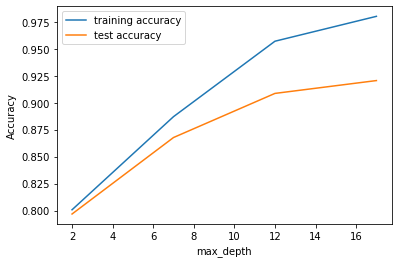

In [87]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [88]:
# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# Instantiatiate the Random forest Classifier
rf_pca = RandomForestClassifier(max_depth=10,class_weight='balanced')

#Fit tree on training data
rf_with_pca = GridSearchCV(rf_pca, parameters, 
                    cv=5, 
                   scoring="accuracy", n_jobs=-1,return_train_score=True,verbose=True)
rf_with_pca.fit(df_train_pca, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   30.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=10,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                               

In [89]:
# scores of GridSearch CV
scores = rf_with_pca.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.499953,0.048351,0.017158,5.749965e-03,4,{'max_features': 4},0.897167,0.903594,0.905714,0.894261,0.897595,0.899667,0.004284,2,0.935591,0.941425,0.931607,0.935897,0.942087,0.937321,0.003930
1,2.942005,0.253794,0.019306,6.005770e-03,8,{'max_features': 8},0.898358,0.903594,0.903333,0.895689,0.897833,0.899762,0.003153,1,0.937913,0.938151,0.938333,0.936313,0.939527,0.938048,0.001030
2,4.354706,0.067565,0.017612,1.357570e-03,14,{'max_features': 14},0.900024,0.898358,0.905238,0.894975,0.892355,0.898190,0.004414,4,0.942497,0.936961,0.939702,0.933575,0.938039,0.938155,0.002955
3,6.349407,0.195392,0.018736,3.719958e-03,20,{'max_features': 20},0.897881,0.902166,0.908571,0.898309,0.889736,0.899333,0.006142,3,0.939104,0.938270,0.941429,0.939944,0.940599,0.939869,0.001106
4,7.017681,0.749699,0.015626,3.989506e-07,24,{'max_features': 24},0.892645,0.902642,0.908095,0.895213,0.888307,0.897381,0.007098,5,0.936246,0.941068,0.936726,0.934290,0.937266,0.937119,0.002215


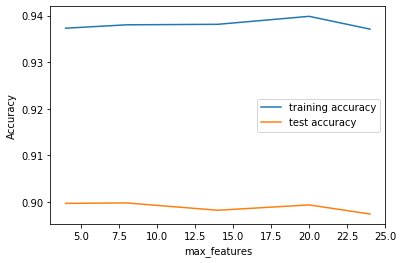

In [90]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [91]:
# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# Instantiatiate the Random forest Classifier
rf_pca_depth = RandomForestClassifier(max_depth=10,class_weight='balanced')

#Fit tree on training data
rf_pca_depth = GridSearchCV(rf_pca_depth, parameters, 
                    cv=5, 
                   scoring="accuracy", n_jobs=-1,return_train_score=True,verbose=True)
rf_pca_depth.fit(df_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   10.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=10,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                               

In [92]:
# scores of GridSearch CV
scores = rf_pca_depth.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.458111,0.071886,0.018200,0.006696,100,{'min_samples_leaf': 100},0.848131,0.857415,0.847143,0.825911,0.840438,0.843810,0.010456,1,0.852194,0.863563,0.852024,0.843045,0.867746,0.855714,0.008864
1,1.245805,0.019844,0.015627,0.000001,150,{'min_samples_leaf': 150},0.831945,0.830755,0.831667,0.813289,0.833770,0.828286,0.007561,2,0.832966,0.844336,0.830000,0.824594,0.847866,0.835952,0.008782
2,1.225062,0.050003,0.015625,0.000001,200,{'min_samples_leaf': 200},0.825518,0.820519,0.819286,0.819005,0.816147,0.820095,0.003067,3,0.828740,0.824751,0.819821,0.831974,0.836022,0.828262,0.005618
3,1.219142,0.045275,0.020336,0.003486,250,{'min_samples_leaf': 250},0.818853,0.815996,0.816190,0.798762,0.809240,0.811810,0.007255,4,0.820704,0.822728,0.815357,0.812987,0.830070,0.820369,0.005990
4,1.299666,0.060872,0.017612,0.003263,300,{'min_samples_leaf': 300},0.814568,0.802904,0.814286,0.801619,0.797809,0.806238,0.006894,5,0.817549,0.810524,0.813214,0.812095,0.819951,0.814667,0.003525


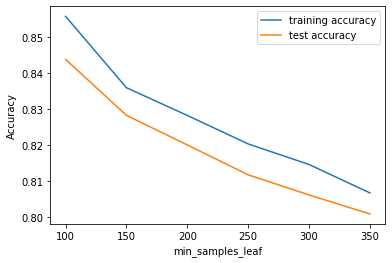

In [93]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [94]:
# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# Instantiatiate the Random forest Classifier
rf_pca_split = RandomForestClassifier(max_depth=10,class_weight='balanced')

#Fit tree on training data
rf_pca_split = GridSearchCV(rf_pca_split, parameters, 
                    cv=5, 
                   scoring="accuracy", n_jobs=-1,return_train_score=True,verbose=True)
rf_pca_split.fit(df_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   12.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=10,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                               

In [95]:
# scores of GridSearch CV
scores = rf_pca_split.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.755982,0.048604,0.022208,0.005715,200,{'min_samples_split': 200},0.863128,0.871935,0.855238,0.854251,0.845439,0.858000,0.008944,1,0.878505,0.876957,0.868333,0.872746,0.871793,0.873667,0.003662
1,1.634482,0.163910,0.017658,0.001776,250,{'min_samples_split': 250},0.850988,0.851464,0.865000,0.845201,0.834723,0.849476,0.009830,2,0.868504,0.863325,0.866845,0.868044,0.865008,0.866345,0.001934
2,1.425073,0.018223,0.015627,0.000001,300,{'min_samples_split': 300},0.843371,0.839562,0.846190,0.823529,0.837580,0.838048,0.007847,3,0.859992,0.852491,0.852083,0.842450,0.863222,0.854048,0.007215
3,1.441197,0.027268,0.018752,0.006250,350,{'min_samples_split': 350},0.847179,0.842895,0.844048,0.826149,0.824958,0.837048,0.009495,4,0.852134,0.854813,0.849821,0.845247,0.855961,0.851595,0.003825
4,1.721963,0.089163,0.021877,0.007655,400,{'min_samples_split': 400},0.837182,0.836706,0.833571,0.832103,0.827340,0.833381,0.003568,5,0.841895,0.847372,0.840179,0.852449,0.852449,0.846869,0.005139


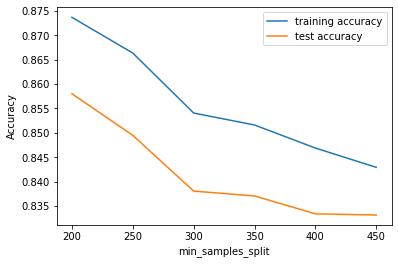

In [96]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [97]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [10],
    'min_samples_leaf': range(100, 200, 100),
    'min_samples_split': range(200, 400, 100),
    'max_features': [8, 10]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')

# Instantiate the grid search model
best_recall = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,
                          cv = 5, n_jobs=-1, verbose = 1)

In [98]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10
                             )

In [99]:
# fit
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features=10,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=100,
                       min_samples_split=200, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [100]:
# predict
y_pred_default = rfc.predict(df_test_pca)

In [101]:
# Confusion Matrix
rf_hyper_confusion=confusion_matrix(y_test,y_pred_default)
rf_hyper_confusion

array([[6999, 1244],
       [ 230,  528]], dtype=int64)

In [102]:
TN = rf_hyper_confusion[0,0] # true positive 
TP = rf_hyper_confusion[1,1] # true negatives
FP = rf_hyper_confusion[0,1] # false positives
FN = rf_hyper_confusion[1,0] # false negatives

print('Accuracy Score:  ',accuracy_score(y_test,y_pred_default))

# Check the sensitivity OR Recall of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Check the Speceficity OR Recall of our logistic regression model
print('Specificity: ',TN / float(TN+FP))

Accuracy Score:   0.8362404177313632
Sensitivity:  0.6965699208443272
Specificity:  0.8490840713332525


## 3. Decision Tree with PCA

In [103]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
dt_default.fit(df_train_pca,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [104]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(df_test_pca)

# # Printing classification report
# print(classification_report(y_test, y_pred_default))

# from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('Acuracy Score', accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.96      0.77      0.85      8243
           1       0.21      0.66      0.31       758

    accuracy                           0.76      9001
   macro avg       0.58      0.71      0.58      9001
weighted avg       0.90      0.76      0.81      9001

[[6317 1926]
 [ 261  497]]
Acuracy Score 0.7570269970003333


In [105]:
confusion_tree = confusion_matrix(y_test,y_pred_default)
TP = confusion_tree[1,1] # true positive 
TN = confusion_tree[0,0] # true negatives
FP = confusion_tree[0,1] # false positives
FN = confusion_tree[1,0] # false negatives

print('Acuracy Score', accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))


Acuracy Score 0.7570269970003333
Sensitivity:  0.6556728232189973
Specificity:  0.7663472036879777


- As we can see above Sensitivity of model is not great let's tune the Hyperparameter

### Hyperparameter tuning

In [108]:
########## lets tune hyper parameterss
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", class_weight='balanced', random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
tree.fit(df_train_pca,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(1, 40)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             sco

In [109]:
y_train.shape

(21000,)

In [110]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.128569,0.005858,0.006651,0.007365,1,{'max_depth': 1},0.813854,0.820043,0.823333,0.817576,0.847821,0.824524,0.012052,30,0.819692,0.815644,0.815179,0.816261,0.854592,0.824273,0.015242
1,0.269096,0.029983,0.000600,0.001201,2,{'max_depth': 2},0.871935,0.874792,0.877619,0.444630,0.541319,0.722095,0.189530,39,0.876897,0.874635,0.873988,0.459377,0.552586,0.727497,0.183255
2,0.340961,0.012216,0.000000,0.000000,3,{'max_depth': 3},0.792192,0.812426,0.810238,0.775185,0.800429,0.798095,0.013549,34,0.799452,0.813322,0.805238,0.772216,0.811737,0.800393,0.014928
3,0.434396,0.006251,0.003126,0.006252,4,{'max_depth': 4},0.698643,0.690788,0.756429,0.775661,0.741129,0.732524,0.032852,38,0.702780,0.700518,0.754821,0.791084,0.752872,0.740415,0.034462
4,0.540650,0.021195,0.006251,0.007656,5,{'max_depth': 5},0.750536,0.764342,0.823571,0.759228,0.782805,0.776095,0.025981,37,0.756057,0.776951,0.827083,0.775728,0.800369,0.787238,0.024375


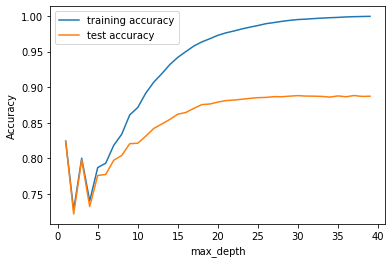

In [111]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [112]:
## Lets tune min sample leaf
# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
tree.fit(df_train_pca,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_sco

In [113]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.058311,0.038394,0.000000,0.000000,5,{'min_samples_leaf': 5},0.853368,0.857415,0.860952,0.854489,0.854965,0.856238,0.002703,1,0.940056,0.942139,0.940060,0.942563,0.945896,0.942143,0.002143
1,0.998006,0.098777,0.006251,0.007656,25,{'min_samples_leaf': 25},0.791954,0.790288,0.800238,0.807097,0.799714,0.797857,0.006109,2,0.837967,0.838205,0.842440,0.839295,0.846021,0.840786,0.003065
2,0.881294,0.025390,0.003126,0.006251,45,{'min_samples_leaf': 45},0.775054,0.769817,0.769048,0.772327,0.772803,0.771810,0.002162,3,0.800881,0.809334,0.801369,0.806678,0.806381,0.804929,0.003275
3,0.846917,0.026883,0.000000,0.000000,65,{'min_samples_leaf': 65},0.770531,0.769103,0.773571,0.754704,0.757561,0.765095,0.007512,4,0.789511,0.793142,0.789345,0.787929,0.786322,0.789250,0.002260
4,0.821915,0.043753,0.003125,0.006250,85,{'min_samples_leaf': 85},0.779814,0.775768,0.745714,0.733984,0.761372,0.759333,0.017446,5,0.787845,0.797845,0.758631,0.761026,0.786322,0.778334,0.015638


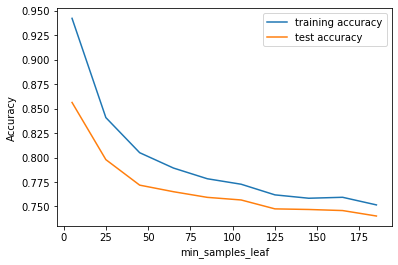

In [114]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 5 to 150

In [115]:
## Tuning min sample split
# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced', random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
tree.fit(df_train_pca,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_sc

In [116]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.188199,0.107628,0.000000,0.000000,5,{'min_samples_split': 5},0.887408,0.885265,0.883810,0.886163,0.882591,0.885048,0.001699,1,0.994464,0.994226,0.994286,0.994584,0.993572,0.994226,0.000351
1,1.136630,0.048902,0.003125,0.006251,25,{'min_samples_split': 25},0.842180,0.841704,0.847143,0.846868,0.835675,0.842714,0.004188,2,0.928448,0.935234,0.927440,0.925838,0.927802,0.928953,0.003257
2,1.134431,0.053767,0.003126,0.006252,45,{'min_samples_split': 45},0.812664,0.821947,0.824762,0.811384,0.809717,0.816095,0.006067,3,0.886303,0.899815,0.889048,0.879591,0.887507,0.888453,0.006535
3,1.109430,0.045289,0.003125,0.006251,65,{'min_samples_split': 65},0.799333,0.798619,0.803333,0.793046,0.791379,0.797143,0.004366,4,0.861361,0.869992,0.857500,0.849235,0.856020,0.858822,0.006822
4,1.078180,0.081494,0.006251,0.007656,85,{'min_samples_split': 85},0.781719,0.794097,0.795952,0.778995,0.774232,0.785000,0.008549,5,0.837490,0.863682,0.841131,0.827927,0.834712,0.840989,0.012143


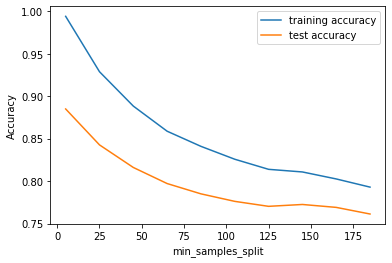

In [117]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 25

In [118]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(5, 200, 20),
    'min_samples_split': range(5, 200, 20),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='recall_score',
                          cv = n_folds, verbose = 1, n_jobs = -1)

# Fit the grid search to the data
grid_search.fit(df_train_pca,y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed: 14.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                  

In [119]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.668833,0.065852,0.000000,0.000000,entropy,5,5,5,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.759105,0.746489,0.801905,0.743272,0.796856,0.769524,0.024995,135
1,1.746964,0.020730,0.006251,0.007655,entropy,5,5,25,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.759105,0.746489,0.801905,0.743272,0.796856,0.769524,0.024995,135
2,1.779435,0.043878,0.002402,0.002061,entropy,5,5,45,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.759105,0.746489,0.801905,0.742796,0.796856,0.769429,0.025095,141
3,1.982251,0.092881,0.005004,0.001266,entropy,5,5,65,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.759105,0.746251,0.801905,0.741605,0.795666,0.768905,0.025137,167
4,1.689055,0.044241,0.007328,0.005116,entropy,5,5,85,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.759105,0.746251,0.801905,0.741129,0.795666,0.768810,0.025241,169


In [120]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8132380952380952
DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [121]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=5,
                                  min_samples_split=5)
clf_gini.fit(df_train_pca,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [122]:
y_pred_default = clf_gini.predict(df_test_pca)
confusion_tree_hyper=confusion_matrix(y_test,y_pred_default)
confusion_tree_hyper

array([[6836, 1407],
       [ 289,  469]], dtype=int64)

In [123]:
TP = confusion_tree_hyper[1,1] # true positive 
TN = confusion_tree_hyper[0,0] # true negatives
FP = confusion_tree_hyper[0,1] # false positives
FN = confusion_tree_hyper[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))


Sensitivity:  0.6187335092348285
Specificity:  0.8293097173359214


## 4. Random Forest with feature selection

In [124]:
X_train.shape

(21000, 140)

In [125]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight={0:0.9,1:0.9})

In [126]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.9, 1: 0.9},
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [127]:
# Making predictions
predictions = rfc.predict(X_test)

In [128]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [129]:
# Let's check the report of our default model
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8243
           1       0.76      0.40      0.53       758

    accuracy                           0.94      9001
   macro avg       0.85      0.70      0.75      9001
weighted avg       0.93      0.94      0.93      9001



In [130]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[8144   99]
 [ 452  306]]


In [131]:
print(accuracy_score(y_test,predictions))

0.9387845794911677


#### Hyperparameter tuning

In [132]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [133]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.342253,0.030801,0.013010,0.001551,2,{'max_depth': 2},0.937158,0.930969,0.933810,0.936413,0.919981,0.931667,0.006234,4,0.938865,0.930472,0.933571,0.939765,0.919826,0.932500,0.007200
1,0.943278,0.075841,0.015612,0.001857,7,{'max_depth': 7},0.942633,0.945251,0.948095,0.944034,0.940938,0.944190,0.002425,1,0.951842,0.948747,0.950000,0.951967,0.952979,0.951107,0.001522
2,1.366780,0.013206,0.017812,0.000400,12,{'max_depth': 12},0.942633,0.942157,0.946190,0.943796,0.940938,0.943143,0.001778,2,0.977796,0.977201,0.977798,0.976489,0.978097,0.977476,0.000573
3,1.652246,0.051237,0.020414,0.000802,17,{'max_depth': 17},0.937396,0.943585,0.947619,0.941415,0.939271,0.941857,0.003549,3,0.993035,0.992083,0.990179,0.991846,0.992441,0.991917,0.000957


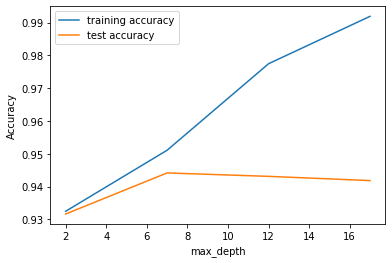

In [134]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [135]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(1, 10, 1)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [136]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.209735,0.008789,0.008007,0.000632,1,{'n_estimators': 1},0.907165,0.908593,0.908810,0.910931,0.911646,0.909429,0.001636,9,0.965057,0.964760,0.963095,0.965835,0.968454,0.965440,0.001752
1,0.372601,0.015316,0.009607,0.001201,2,{'n_estimators': 2},0.930731,0.932873,0.935952,0.935223,0.928554,0.932667,0.002758,7,0.971189,0.968689,0.971012,0.970418,0.969942,0.970250,0.000897
2,0.529762,0.014637,0.010208,0.000401,3,{'n_estimators': 3},0.934539,0.929779,0.935238,0.931650,0.931889,0.932619,0.002004,8,0.986190,0.985416,0.985000,0.986727,0.986132,0.985893,0.000611
3,0.698833,0.028804,0.012410,0.001357,4,{'n_estimators': 4},0.934301,0.937158,0.940476,0.938080,0.932603,0.936524,0.002784,6,0.982618,0.982558,0.982083,0.981668,0.984465,0.982679,0.000958
4,0.899442,0.038604,0.015812,0.003658,5,{'n_estimators': 5},0.934301,0.940728,0.940000,0.937604,0.940462,0.938619,0.002426,5,0.990714,0.990952,0.989643,0.989643,0.991548,0.990500,0.000751


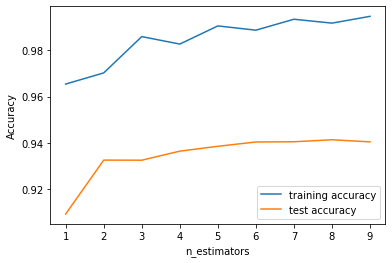

In [137]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [138]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [10, 25, 50, 75 , 100]} 

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [139]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.521717,0.028180,0.022616,0.004226,10,{'max_features': 10},0.938110,0.943109,0.944286,0.941415,0.938319,0.941048,0.002488,4,0.993452,0.993095,0.992857,0.993750,0.993512,0.993333,0.000317
1,4.180319,0.146512,0.022416,0.003501,25,{'max_features': 25},0.942157,0.940252,0.942619,0.942129,0.939509,0.941333,0.001221,3,0.993631,0.992857,0.993690,0.993691,0.993215,0.993417,0.000332
2,8.676781,0.106641,0.020414,0.000489,50,{'max_features': 50},0.939300,0.941443,0.944048,0.945225,0.937604,0.941524,0.002842,2,0.993988,0.993095,0.993631,0.993453,0.993869,0.993607,0.000316
3,13.507388,0.374868,0.021416,0.003325,75,{'max_features': 75},0.940014,0.939300,0.944762,0.942129,0.938557,0.940952,0.002247,5,0.992440,0.992500,0.992321,0.993631,0.993691,0.992917,0.000611
4,18.005246,0.399816,0.020414,0.001356,100,{'max_features': 100},0.938824,0.943347,0.945714,0.943082,0.937842,0.941762,0.002962,1,0.993631,0.994107,0.993512,0.993631,0.993215,0.993619,0.000287


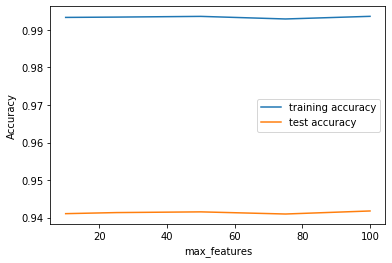

In [140]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [141]:
# Create the parameter grid based on the results of random search  
param_grid = {     'max_depth': [2,4,6],
                   'n_estimators': [1,2,3],
                   'max_features': [5,15,25] } 

# Create a based model 
rf = RandomForestClassifier() 

# Instantiate the grid search 
model_GSV = GridSearchCV(estimator = rf, param_grid = param_grid,cv = 3, n_jobs = -1,verbose = 1) 

# Fit the grid search to the data grid_search.fit(X_train, y_train) 
model_GSV.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   11.4s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [142]:
print(model_GSV.best_score_,'using',model_GSV.best_params_)

0.9432857142857143 using {'max_depth': 4, 'max_features': 15, 'n_estimators': 3}


In [143]:
# model with the best hyperparameters from sklearn.ensemble
rfc_best = RandomForestClassifier(bootstrap=True,         max_depth=4,
                                                           max_features=20,
                                                           n_estimators=2,
                                                           class_weight={0:0.9,1:0.9}) 
rfc_best.fit(X_train,y_train) 

RandomForestClassifier(bootstrap=True, class_weight={0: 0.9, 1: 0.9},
                       criterion='gini', max_depth=4, max_features=20,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=2, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [144]:
# Making predictions
predictions_inc = rfc_best.predict(X_test)
print(predictions_inc)

[0 0 0 ... 0 0 0]


In [145]:
print(metrics.classification_report(y_test,predictions_inc))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8243
           1       0.74      0.40      0.52       758

    accuracy                           0.94      9001
   macro avg       0.85      0.69      0.74      9001
weighted avg       0.93      0.94      0.93      9001



In [146]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions_inc))

[[8138  105]
 [ 454  304]]


In [147]:
print(accuracy_score(y_test,predictions_inc))

0.9378957893567381


In [148]:
import pandas as pd
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [149]:
feature_importances.head(25)

,importance
max_rech_amt_8,0.074521
total_ic_mou_8,0.048848
og_others_8,0.039238
loc_ic_mou_8,0.035968
roam_ic_mou_8,0.032593
roam_og_mou_8,0.029066
total_og_mou_diff,0.022583
arpu_8,0.019912
av_rech_amt_data_8,0.016345
loc_ic_t2m_mou_8,0.015822


In [150]:
import pandas as pd
feature_importances_afterHPTuning= pd.DataFrame(rfc_best.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances_afterHPTuning.head(10)

,importance
arpu_8,0.525564
og_others_8,0.067403
total_ic_mou_8,0.062076
loc_og_t2m_mou_8,0.057875
total_og_mou_8,0.057505
total_rech_data_amt_7,0.047829
loc_ic_mou_8,0.038153
last_day_rch_amt_8,0.030048
av_rech_amt_data_8,0.024036
total_ic_mou_diff,0.021736


#### The top 5 features comprising of more than 75% importances are,
1) total_ic_mou_8

2) total_rech_amt_8

3) roam_og_mou_8

4) total_ic_mou_7

5) loc_ic_mou_8

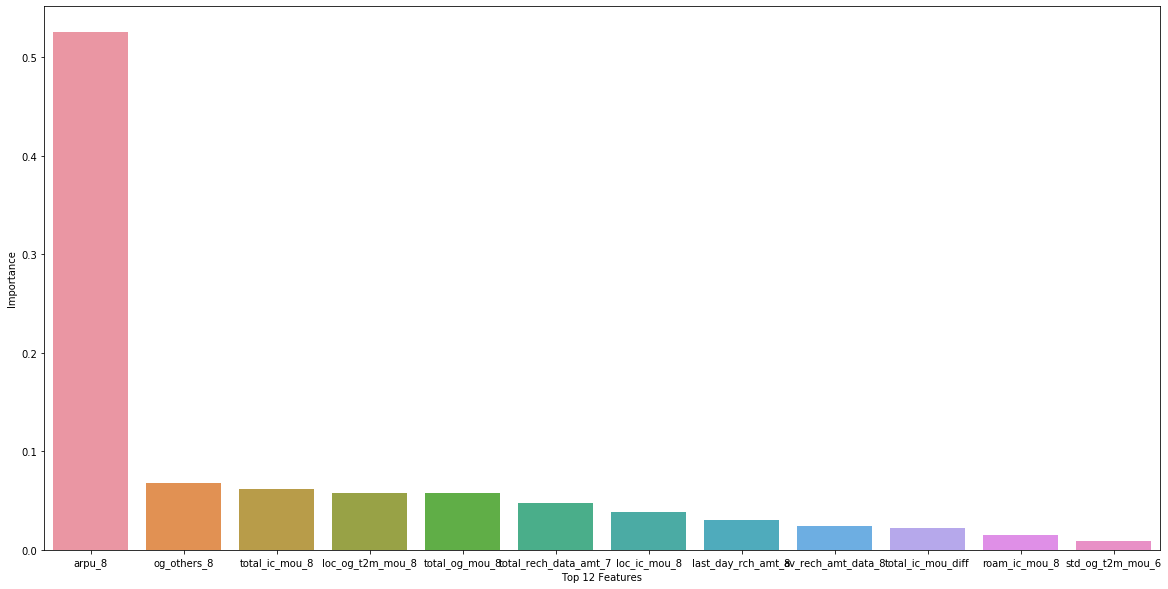

In [151]:
imp=rfc_best.feature_importances_
names=X_train.columns.values
imp,names=zip(*sorted(zip(imp,names)))

df_1=pd.DataFrame({"Variable":names,"importance":imp})
df_2 = df_1.sort_values(by="importance",axis=0,ascending=False)
df_2 = df_2.reset_index(drop=True)


plt.figure(figsize=(20, 10))

ax = sns.barplot(x='Variable', y= 'importance', data=df_2[0:12])
ax.set(xlabel = 'Top 12 Features', ylabel = 'Importance')
plt.show()

## Final Analysis and Conclusion

#### Results with PCA based logistic regression:
Accuracy    = 0.7908010221086545
sensitivity = 0.7730870712401056
specificity = 0.8644910833434429

#### Results of PCA based Random Forest
Accuracy    = 0.8065770469947784
Sensitivity = 0.716358839050132
Specificity = 0.8573334950867403

#### Results of PCA based Decision Tree

Acuracy     = 0.8065770469947784
Sensitivity = 0.6174142480211082
Specificity = 0.8239718549071939

Accuracy is measured using AUC
Based on the Confusion Matrix, Logistic regression model is best suited among all other due to balance between Accuracy and Sensitivity


1. Roaming outgoing for Month 8, Average Revenue Per Customer for Month 8 and Max Recharge Amount for Month 8 are the most important predictor variables to predict churn.

2. Average Revenue Per User decreases from 6th to 7th month to 8th month as most of the users are churned by 8th month.

3. Higher the incoming roaming amount, higher is the churn rate. Focus on customers whose incoming roaming amount has increased, because they are likely to churn

4. Max Recharge Amount is a strong feature to predict churn hence focus on the customer whoes Avg max recharge amount has been in 8th Month

5. Increase the additional datapack in the 8th month to retain the customer since it is strong predictor of churn
